In [115]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [116]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [117]:
len(x_train)

60000

In [118]:
len(x_test)

10000

In [119]:
# What we are doing here is called scaling. It is used to improve the accuracy of ml models. Each value in our array ranges between 0 to 255. 
# So we are dividing the whole array by 255.
x_train = x_train/255
x_test = x_test/255

In [120]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

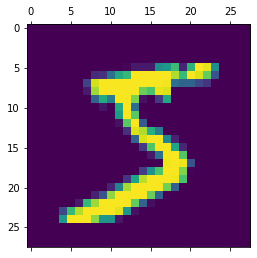

In [121]:
plt.matshow(x_train[0])

FLATTEN THE TRAINING DATASET FRO 28 BY 28 IMAGE INTO A SINGLE DIMENSIONAL ARRAY

In [122]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [123]:
x_test_flattened.shape

(10000, 784)

In [133]:
# Create a simple neural network (a neural network with only input and output layers)
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation ='sigmoid')
    
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(x_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4688 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9259


In [125]:
# Let's evaluate the accuracy on a test dataset
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9694


[0.09531386941671371, 0.9693999886512756]

In [ ]:
# Add a hidden layer and evaluate
model = keras.Sequential([
    #ALSO TRY SOME MORE HIDDEN LAYERS AS WELL. ALSO TRY TO PLAY WITH DIFFERENT ACTIVATION FUNCTIONS AND IF YOU CAN IMPROVE THE ACCURACY OF THE MODEL
    keras.layers.Dense(100, input_shape=(784,), activation ='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

#ASSIGNMENT: TRY DIFFERENT OPTIMIZER AND LOSS FUNCTION FROM KERAS OR TENSORFLOW, ALSO USE DIFFERENT VALUES OF EPOCHS. SEE IF YOU CAN GET MORE ACCURACY THAN CURRENT % 
model.fit(x_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2690 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1208 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0844 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0646 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0518 - accuracy: 0.9840


In [135]:
# Let's evaluate the accuracy on a test dataset
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - 2s 4ms/step - loss: 0.0850 - accuracy: 0.9747


[0.0849793553352356, 0.9746999740600586]

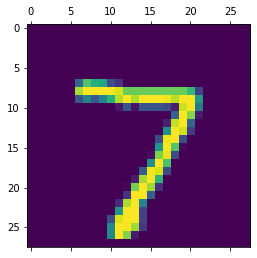

In [126]:
plt.matshow(x_test[0])

In [127]:
# Let's do sample prediction
y_predicted = model.predict(x_test_flattened)
y_predicted[0]


313/313 [==============================] - 1s 3ms/step


array([1.6022148e-02, 1.0641918e-03, 6.9193077e-01, 9.6808296e-01,
       1.0885936e-05, 6.5780014e-02, 1.0296927e-08, 9.9999326e-01,
       5.0586391e-02, 7.9472637e-01], dtype=float32)

In [128]:
# Let's look at the maximum value
np.argmax(y_predicted[0])

7

In [129]:
# Let's look at how our prediction look like using the confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]



In [130]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    1,    1,    4,    2,    3,    1,    2],
       [   0, 1119,    2,    1,    0,    3,    2,    1,    7,    0],
       [   7,    2,  991,    6,    2,    3,    2,    8,   11,    0],
       [   0,    0,    1,  972,    1,   18,    0,    4,    2,   12],
       [   2,    1,    2,    0,  941,    3,    5,    4,    1,   23],
       [   2,    0,    0,    3,    1,  883,    0,    0,    2,    1],
       [   3,    3,    1,    1,    6,   20,  922,    0,    2,    0],
       [   2,    7,   10,    5,    1,    0,    0,  980,    3,   20],
       [   4,    0,    0,    4,    2,   21,    0,    2,  930,   11],
       [   2,    2,    0,    3,    4,    5,    0,    2,    1,  990]])>

Text(69.0, 0.5, 'Actual')

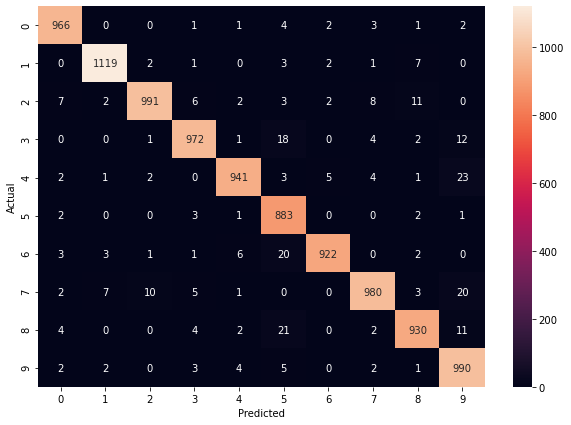

In [131]:
# Let's visualize the confusion matrix using the seaborn library
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [132]:
# Go back and add a hidden layer in your model to see how well it performs